# Importig Libraries

In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from matplotlib import pyplot as plt

# Creating Dataframes

In [104]:
def dataframeCreation(timesteps, list):
    
    X = []
    y = list[timesteps:]
    
    for i in range(0, len(list)-timesteps):
        X.append(list[i:(timesteps+i)])
    
    return np.array(X),np.array(y)
    

In [105]:
list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
timesteps = 6
X,y = dataframeCreation(timesteps, list)
print(X)
y

[[ 1  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]
 [ 8  9 10 11 12 13]
 [ 9 10 11 12 13 14]
 [10 11 12 13 14 15]
 [11 12 13 14 15 16]
 [12 13 14 15 16 17]
 [13 14 15 16 17 18]
 [14 15 16 17 18 19]]


array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Here we change shape of X to a 3 dimensions as LSTM model doesnt take a 2D array

In [106]:
X.shape

(14, 6)

In [107]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(14, 6, 1)

# Model building

I tried using Bidirectional LSTM, provided by keras as a wrapper.

In [108]:
# When return_sequences=True,
# the LSTM layer will return the entire sequence of hidden state outputs, 
# one output for each time step in the input sequence
# in the context of our time series forecasting problem,
# setting return_sequences=True is likely because we want to pass the output sequence 
# from the LSTM layer to another layer (LSTM)

model = Sequential([
    Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(timesteps, n_features))),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(1)
    ])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(X, y, epochs = 300, verbose=2)

Epoch 1/300
1/1 - 10s - 10s/step - accuracy: 0.0000e+00 - loss: 205.2531
Epoch 2/300
1/1 - 0s - 45ms/step - accuracy: 0.0000e+00 - loss: 197.9353
Epoch 3/300
1/1 - 0s - 52ms/step - accuracy: 0.0000e+00 - loss: 190.8327
Epoch 4/300
1/1 - 0s - 49ms/step - accuracy: 0.0000e+00 - loss: 183.7155
Epoch 5/300
1/1 - 0s - 57ms/step - accuracy: 0.0000e+00 - loss: 176.1936
Epoch 6/300
1/1 - 0s - 46ms/step - accuracy: 0.0000e+00 - loss: 168.0155
Epoch 7/300
1/1 - 0s - 49ms/step - accuracy: 0.0000e+00 - loss: 158.8718
Epoch 8/300
1/1 - 0s - 53ms/step - accuracy: 0.0000e+00 - loss: 148.4152
Epoch 9/300
1/1 - 0s - 63ms/step - accuracy: 0.0000e+00 - loss: 136.6717
Epoch 10/300
1/1 - 0s - 45ms/step - accuracy: 0.0000e+00 - loss: 123.1698
Epoch 11/300
1/1 - 0s - 44ms/step - accuracy: 0.0000e+00 - loss: 107.6630
Epoch 12/300
1/1 - 0s - 41ms/step - accuracy: 0.0000e+00 - loss: 89.8632
Epoch 13/300
1/1 - 0s - 44ms/step - accuracy: 0.0000e+00 - loss: 69.9628
Epoch 14/300
1/1 - 0s - 56ms/step - accuracy: 0.0

In [109]:
# demonstrate prediction for next 10 days
x_input=np.array([15,16,17,18,19,20])
temp_input=[15,16,17,18,19,20]
lst_output=[]
i=0
while(i<20):
    
    if(len(temp_input)>timesteps):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, timesteps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, timesteps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[21.029371]
1 day input [16.         17.         18.         19.         20.         21.02937126]
1 day output [[22.06797]]
2 day input [17.         18.         19.         20.         21.02937126 22.06797028]
2 day output [[23.135857]]
3 day input [18.         19.         20.         21.02937126 22.06797028 23.13585663]
3 day output [[24.219759]]
4 day input [19.         20.         21.02937126 22.06797028 23.13585663 24.21975899]
4 day output [[25.334194]]
5 day input [20.         21.02937126 22.06797028 23.13585663 24.21975899 25.33419418]
5 day output [[26.478283]]
6 day input [21.029371 22.06797  23.135857 24.219759 25.334194 26.478283]
6 day output [[27.650564]]
7 day input [22.06797  23.135857 24.219759 25.334194 26.478283 27.650564]
7 day output [[28.85628]]
8 day input [23.135857 24.219759 25.334194 26.478283 27.650564 28.85628 ]
8 day output [[30.104559]]
9 day input [24.219759 25.334194 26.478283 27.650564 28.85628  30.104559]
9 day output [[31.406647]]
10 day input [25.3341

# Visualization(to my best capabilities)

In [110]:
date_old = [i+1 for i in range(20)]
date_new = [i+1 for i in range(20, 40)]


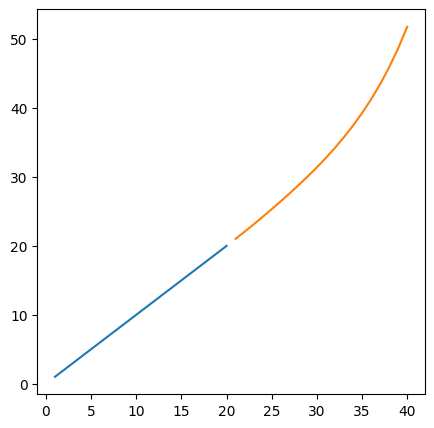

In [111]:
plt.figure(figsize=(5,5))
plt.plot(date_old, list)
plt.plot(date_new, lst_output)
plt.show()